In [1]:
import json
import os

sat2stat_file_path = os.path.join("dataset", "sat2stat_efficiency.json")


# Write the dictionary to a file in JSON format
with open(sat2stat_file_path, 'r') as file:
    communication_efficiency_sat2stat = json.load(file)
    
    
sat2sat_file_path = os.path.join("dataset", "sat2sat_efficiency.json")


# Write the dictionary to a file in JSON format
with open(sat2sat_file_path, 'r') as file:
    communication_efficiency_sat2sat = json.load(file)
    

In [2]:
from algorithm.graph import generate_graph, get_optimal_consellation, generate_sub_graph, dijkstra_efficiency
from algorithm.steiner import build_steiner_tree

In [3]:
threshold = 0.0001
G, ground_stations, satellites = generate_graph(communication_efficiency_sat2stat, communication_efficiency_sat2sat, threshold)

In [4]:
start = "New York"

graph = G
tree, steiner_tree_edges = build_steiner_tree(G, start, ground_stations)
print("Constructed Tree Nodes:", tree)
print("Steiner Tree Edges:", steiner_tree_edges)

Constructed Tree Nodes: {'Canberra', 'STARLINK-1053', 'Ottawa', 'STARLINK-1397', 'Singapore', 'Washington D.C.', 'STARLINK-1144', 'STARLINK-1154', 'STARLINK-1123', 'STARLINK-1030', 'London', 'STARLINK-1971', 'New York', 'Jerusalem', 'Brussels', 'Amsterdam', 'Paris', 'STARLINK-1160', 'Los Angeles', 'STARLINK-2751', 'STARLINK-1102', 'Seoul', 'Tokyo', 'Chicago', 'STARLINK-1054', 'Berlin', 'Beijing', 'STARLINK-1221', 'New Delhi'}
Steiner Tree Edges: [('New York', 'STARLINK-1102'), ('STARLINK-1102', 'Ottawa'), ('STARLINK-1102', 'STARLINK-1221'), ('STARLINK-1221', 'Brussels'), ('STARLINK-1221', 'Amsterdam'), ('STARLINK-1221', 'Paris'), ('STARLINK-1221', 'London'), ('STARLINK-1221', 'STARLINK-1123'), ('STARLINK-1123', 'Jerusalem'), ('STARLINK-1102', 'STARLINK-1054'), ('STARLINK-1054', 'Los Angeles'), ('STARLINK-1054', 'Chicago'), ('STARLINK-1102', 'STARLINK-1144'), ('STARLINK-1144', 'Washington D.C.'), ('STARLINK-1102', 'STARLINK-1971'), ('STARLINK-1971', 'Berlin'), ('STARLINK-1123', 'STARLIN

In [5]:
print(f"{len(tree)-len(ground_stations)} satellites could cover all the ground stations")

12 satellites could cover all the ground stations


In [10]:
ground_stations

{'Amsterdam',
 'Beijing',
 'Berlin',
 'Brussels',
 'Canberra',
 'Chicago',
 'Jerusalem',
 'London',
 'Los Angeles',
 'New Delhi',
 'New York',
 'Ottawa',
 'Paris',
 'Seoul',
 'Singapore',
 'Tokyo',
 'Washington D.C.'}

In [11]:
optimal_constellation = get_optimal_consellation(tree, ground_stations)

In [12]:
print("Constellations:")
print(optimal_constellation)

Constellations:
['STARLINK-1021', 'STARLINK-1054', 'STARLINK-1053', 'STARLINK-2024', 'STARLINK-1971', 'STARLINK-1236', 'STARLINK-1445', 'STARLINK-1020', 'STARLINK-1144', 'STARLINK-5512']


In [13]:
print("Constellations:")
print(optimal_constellation)

Constellations:
['STARLINK-1021', 'STARLINK-1054', 'STARLINK-1053', 'STARLINK-2024', 'STARLINK-1971', 'STARLINK-1236', 'STARLINK-1445', 'STARLINK-1020', 'STARLINK-1144', 'STARLINK-5512']


In [14]:
sub_graph = generate_sub_graph(G, ground_stations, optimal_constellation)

In [15]:
city1 = 'Beijing'
city2 = 'Tokyo'
# Make sure to define your `sub_graph` before calling this function
optimal_path, efficiency = dijkstra_efficiency(sub_graph, city1, city2)
print(f"Optimal path from {city1} to {city2} is: {optimal_path}, efficiency: {efficiency}")


Optimal path from Beijing to Tokyo is: ['Beijing', 'STARLINK-1021', 'STARLINK-1053', 'Tokyo'], efficiency: 5.7942246446643865e-09


In [16]:
city1 = 'New York'
city2 = 'Los Angeles'
# Make sure to define your `sub_graph` before calling this function
optimal_path, efficiency = dijkstra_efficiency(sub_graph, city1, city2)
print(f"Optimal path from {city1} to {city2} is: {optimal_path}, efficiency: {efficiency}")



Optimal path from New York to Los Angeles is: ['New York', 'STARLINK-1144', 'STARLINK-1054', 'Los Angeles'], efficiency: 5.045587417391956e-10


In [17]:
city1 = 'New York'
city2 = 'Washington D.C.'
# Make sure to define your `sub_graph` before calling this function
optimal_path, efficiency = dijkstra_efficiency(sub_graph, city1, city2)
print(f"Optimal path from {city1} to {city2} is: {optimal_path}, efficiency: {efficiency}")



Optimal path from New York to Washington D.C. is: ['New York', 'STARLINK-1144', 'Washington D.C.'], efficiency: 1.5629063975258394e-06


In [18]:
city1 = 'New York'
city2 = 'Chicago'
# Make sure to define your `sub_graph` before calling this function
optimal_path, efficiency = dijkstra_efficiency(sub_graph, city1, city2)
print(f"Optimal path from {city1} to {city2} is: {optimal_path}, efficiency: {efficiency}")



Optimal path from New York to Chicago is: ['New York', 'STARLINK-1144', 'Chicago'], efficiency: 3.6359364601917305e-07


In [19]:
city1 = 'London'
city2 = 'Berlin'
# Make sure to define your `sub_graph` before calling this function
optimal_path, efficiency = dijkstra_efficiency(sub_graph, city1, city2)
print(f"Optimal path from {city1} to {city2} is: {optimal_path}, efficiency: {efficiency}")

Optimal path from London to Berlin is: ['London', 'STARLINK-1971', 'Berlin'], efficiency: 6.581082544525907e-07


In [20]:
constellation_file_path = './dataset/constellation_optimal.json' 
constellation = {"constellation": optimal_constellation,
                 "ground_stations": list(ground_stations),
                "graph": sub_graph}

# Write the dictionary to a file in JSON format
with open(constellation_file_path, 'w') as file:
    json.dump(constellation, file)

In [21]:
ground_stations

{'Amsterdam',
 'Beijing',
 'Berlin',
 'Brussels',
 'Canberra',
 'Chicago',
 'Jerusalem',
 'London',
 'Los Angeles',
 'New Delhi',
 'New York',
 'Ottawa',
 'Paris',
 'Seoul',
 'Singapore',
 'Tokyo',
 'Washington D.C.'}

In [16]:
from load_data.get_satellites import satellite, get_satellites
from load_data.get_ground_stations import ground_station, get_ground_station
from load_data.load_tle import parse_tle
from skyfield.api import load
from model.distribution_efficiency_sat2sat import communication_loss_sat2sat
from model.distribution_efficiency_stat2sat import communication_loss_stat2sat

In [17]:
ground_stations_entity = get_ground_station()
# Path to the downloaded TLE data file
tle_path = './dataset/satellite_tle.txt'
satellite_tle_data = parse_tle(tle_path)
ts = load.timescale()
specific_time = ts.utc(2024, 1, 1, 0, 0, 0)
ground_stations_entity = get_ground_station()
satellites_entity = get_satellites(satellite_tle_data, ts, specific_time)
links = ['New York', 'STARLINK-1144', 'STARLINK-1054', 'Los Angeles']

In [18]:
optimal_constellation_entity = {}
for sat_name, tle in satellite_tle_data.items():
    if sat_name in optimal_constellation:
        optimal_constellation_entity[sat_name] = satellite(sat_name, tle[0], tle[1], specific_time)

In [19]:
optimal_constellation_entity

{'STARLINK-1020': <load_data.get_satellites.satellite at 0x1a5e7ce21d0>,
 'STARLINK-1054': <load_data.get_satellites.satellite at 0x1a5ba0e30d0>,
 'STARLINK-1060': <load_data.get_satellites.satellite at 0x1a617f8e5d0>,
 'STARLINK-1144': <load_data.get_satellites.satellite at 0x1a617f8eb50>,
 'STARLINK-1236': <load_data.get_satellites.satellite at 0x1a617f8f0d0>,
 'STARLINK-1971': <load_data.get_satellites.satellite at 0x1a617f8f650>,
 'STARLINK-2024': <load_data.get_satellites.satellite at 0x1a617f8f9d0>,
 'STARLINK-3905': <load_data.get_satellites.satellite at 0x1a617f8fe50>,
 'STARLINK-30173': <load_data.get_satellites.satellite at 0x1a617f8fe10>}

In [20]:
def communication_loss(link, ground_stations):
    if link[0] in ground_stations:
        #input: station, satellite
        efficiency = communication_loss_stat2sat(ground_stations_entity[link[0]], optimal_constellation_entity[link[1]]) 
    elif link[1] in ground_stations:
        efficiency = communication_loss_stat2sat(ground_stations_entity[link[1]], optimal_constellation_entity[link[0]]) 
    else:
        efficiency = communication_loss_sat2sat(optimal_constellation_entity[link[0]], optimal_constellation_entity[link[1]]) 
    return efficiency

In [21]:
# update link efficiency
def update_efficiency(links, ground_stations):
    eta_total = 1
    for i in range(len(links)-1):
        link = (links[i], links[i+1])
        #print(link)
        eta = communication_loss(link, ground_stations)
        eta_total *= eta
    return eta_total

In [22]:
links = ['New York', 'STARLINK-1144', 'Washington D.C.']
update_efficiency(links, ground_stations)

1.5629063975258394e-06

In [23]:
specific_time = ts.utc(2024, 1, 1, 0, 0, 0)
start_time = specific_time
end_time = specific_time+30

time_steps = 30*1440*60
current_time = start_time


In [24]:
import matplotlib.pyplot as plt
from datetime import timedelta

In [33]:
links

['New York', 'STARLINK-1144', 'Washington D.C.']

In [26]:
efficiency_history = []
i = 0
for _ in range(time_steps):
    for sat_name, satellite in optimal_constellation_entity.items():
        if sat_name in links:
            satellite.change_time(current_time)
    # 重新计算链路效率
    eta_total = update_efficiency(links, ground_stations)
    efficiency_history.append(eta_total)
    current_time += (end_time-start_time)/time_steps

In [28]:
import json

In [43]:
efficiency_history_file_path = './dataset/efficiencyd_history_New_York_Washington D.C.json' 

# Write the dictionary to a file in JSON format
with open(efficiency_history_file_path, 'w') as file:
    json.dump(efficiency_history, file)

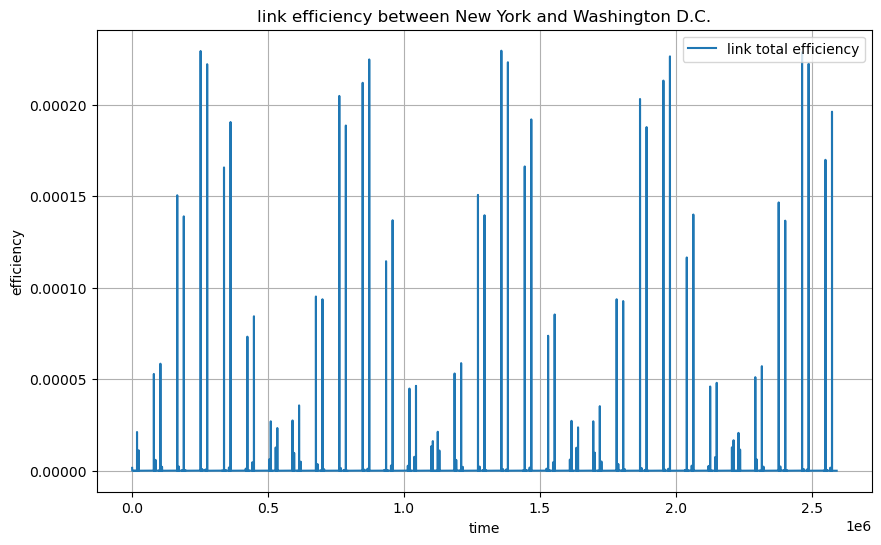

In [27]:
# 绘制效率随时间变化的图
plt.figure(figsize=(10, 6))
plt.plot(efficiency_history, label='link total efficiency')
plt.xlabel('time')
plt.ylabel('efficiency')
plt.title('link efficiency between New York and Washington D.C.')
plt.legend()
plt.grid(True)
plt.show()

In [45]:
import numpy as np
#draw the distribution graph
# Step 1: Convert eta to dB, filtering out zeros first
eta_history_np = np.array(efficiency_history)
eta_nonzero = eta_history_np[eta_history_np > 0.00000000001]  # Filter out zero values
eta_dB = 10 * np.log10(eta_nonzero)  # Convert to dB

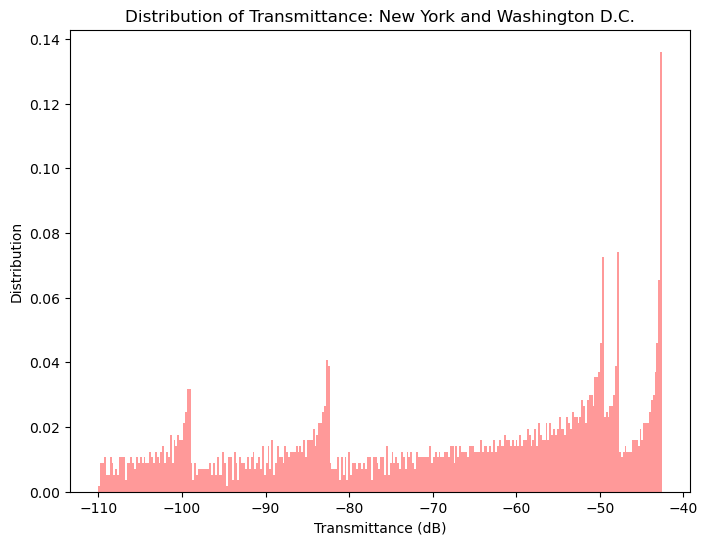

In [46]:
# Step 2: Plotting
plt.figure(figsize=(8, 6))
n, bins, patches = plt.hist(eta_dB, bins=300, density=True, alpha=0.4, color='r')  # You can adjust bins for better visualization

plt.xlabel('Transmittance (dB)')
plt.ylabel('Distribution')
plt.title('Distribution of Transmittance: New York and Washington D.C.')
plt.grid(False)
plt.show()

In [111]:
for sat_name, satellite in optimal_constellation_entity.items():
    satellite.change_time(specific_time)
# 重新计算链路效率
eta_total = update_efficiency(links, ground_stations)
eta_total

5.045587417391956e-10

In [152]:
test = []
for i in range(-1500,1500, 1):
    for sat_name, satellite in optimal_constellation_entity.items():
        satellite.change_time(specific_time+i/1440)
    # 重新计算链路效率
    eta_total = update_efficiency(links, ground_stations)
    test.append(eta_total)

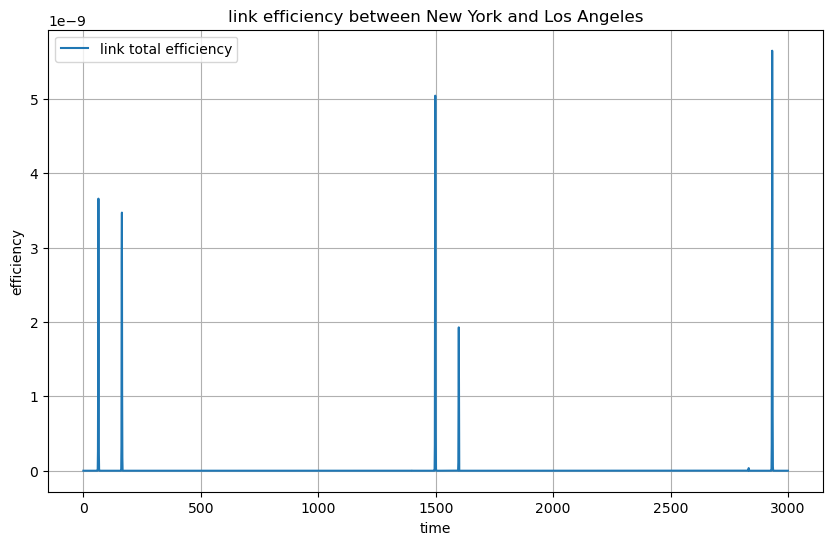

In [153]:
# 绘制效率随时间变化的图
plt.figure(figsize=(10, 6))
plt.plot(test, label='link total efficiency')
plt.xlabel('time')
plt.ylabel('efficiency')
plt.title('link efficiency between New York and Los Angeles')
plt.legend()
plt.grid(True)
plt.show()

In [173]:
specific_time = ts.utc(2024, 1, 1, 0, 0, 0)
start_time = specific_time-5/1440
end_time = specific_time+5/1440

time_steps = 6000
current_time = start_time


In [174]:
efficiency_history = []
i = 0
for _ in range(time_steps):
    for sat_name, satellite in optimal_constellation_entity.items():
        satellite.change_time(current_time)
    # 重新计算链路效率
    eta_total = update_efficiency(links, ground_stations)
    efficiency_history.append(eta_total)
    current_time += (end_time-start_time)/time_steps

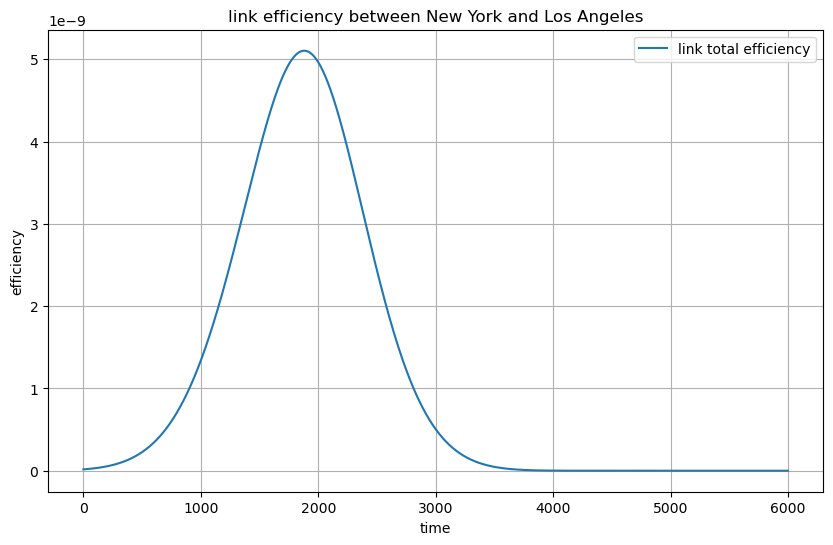

In [175]:
# 绘制效率随时间变化的图
plt.figure(figsize=(10, 6))
plt.plot(efficiency_history, label='link total efficiency')
plt.xlabel('time')
plt.ylabel('efficiency')
plt.title('link efficiency between New York and Los Angeles')
plt.legend()
plt.grid(True)
plt.show()

In [10]:
(1<<17)/3600/24

1.517037037037037

In [14]:
(1<<17)/1000

131.072

In [35]:
links = ['London', 'STARLINK-1971', 'Berlin']
update_efficiency(links, ground_stations)

6.581082544525907e-07

In [37]:
efficiency_history_London_Berlin = []
i = 0
for _ in range(time_steps):
    for sat_name, satellite in optimal_constellation_entity.items():
        if sat_name in links:
            satellite.change_time(current_time)
    # 重新计算链路效率
    eta_total = update_efficiency(links, ground_stations)
    efficiency_history_London_Berlin.append(eta_total)
    current_time += (end_time-start_time)/time_steps

In [40]:
efficiency_history_file_path = './dataset/efficiencyd_history_London_Berlin.json' 

# Write the dictionary to a file in JSON format
with open(efficiency_history_file_path, 'w') as file:
    json.dumps(efficiency_history_London_Berlin)